#Assignment Topik 13

##Business Understanding
> Data yang digunakan : train.csv

> Variabel Target : SalePrice (harga jual properti dalam dolar)

Berikut link mengenai pemahaman dataframe 

https://docs.google.com/document/d/15DVFuIUhi9v_utMK2D1D_aaWtyhUcxnq_A--EuzOzM8/edit?usp=sharing

##Data Understanding







###Import Library

In [958]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**SUMMARY**

---
1. Pandas
  - Untuk melakukan manipulasi dan analisis data, terutama dalam bentuk tabel atau DataFrame.
2. Numpy
  - Untuk melakukan operasi matematika dan array multidimensi.
3. Seaborn
  - Untuk membuat visualisasi data yang lebih kompleks dan menarik dibandingkan dengan library 'matplotlib'.
4. Matplotlib
  - Untuk membuat plot dan visualisasi data dalam bentuk grafik atau diagram.
6. Warnings
  - Berguna untuk mengabaikan peringatan yang muncul pada console yang mungkin tidak diperlukan atau mengganggu.





**SUMMARY**

###Read Dataset

In [959]:
house = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Day13-14/Assignment/train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [960]:
house.shape

(1460, 81)

In [961]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [962]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##Data Preparation

In [963]:
house_null = house.isnull().sum()
house_null[house_null != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

**SUMMARY**

1. Drop column Id, karena untuk memprediksi suatu data column Id tidak berpengaruh kepada hasil prediksi.
2. Drop columns : Alley, FireplaceQu, PoolQC, Fence, MiscFeature, karena data kolom tersebut null-nya melebihi 50% dari 1460 entries.
3. Handling Missing Values : MasVnrType, BsmtQual, BsmtCond, BsmtExposure, Electrical, GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType1, dan BsmtFinType2. Menggunakan modus karena data tersebut merupakan data kategorik.
4. Handling Missing Values : MasVnrArea, LotFrontage, dan GarageYrBlt. Data numerik menggunakan handling median karena sebaran tersebut tidak menyebar normal.

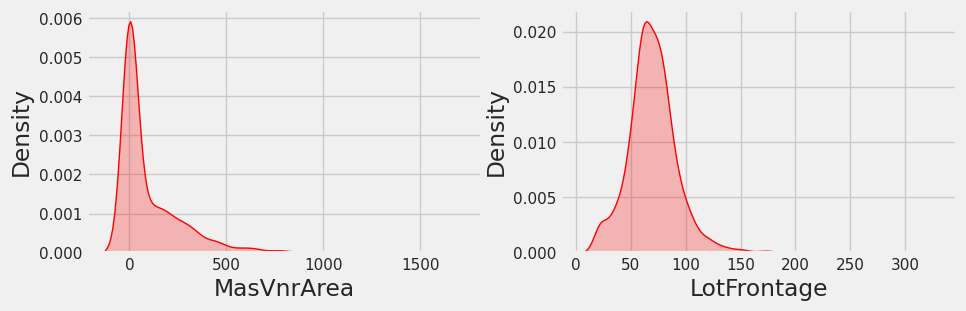

In [964]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
sns.set(style="darkgrid")
sns.kdeplot(x="MasVnrArea", data=house, shade=True, color='Red', ax = axes[0]) 
sns.kdeplot(x="LotFrontage", data=house, shade=True, color='Red', ax = axes[1]) 
plt.show()

**SUMMARY**

MasVnrArea dan LotFrontage merupakan features dari dataframe. Oleh karena itu, karena data tersebut termasuk data numerik, maka perlu diperhatikan terlebih dahulu sebaran datanya. Sebaran data MasVnrArea dan LotFrontage tidak termasuk ke dalam sebaran normal. Dengan demikian, handling yang perlu dilakukan yaitu dengan menggunakan median.



##Handling Missing Values

In [965]:
#Drop columns
house = house.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
#Handling missing values with mode
cols_mode = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','Electrical','GarageType','GarageFinish','GarageQual','GarageCond','BsmtFinType1','BsmtFinType2']
for col in cols_mode:
  house[col] = house[col].fillna(house[col].mode()[0])
#Handling missing values with median
cols_median = ['MasVnrArea','LotFrontage','GarageYrBlt']
for col in cols_median:
  house[col] = house[col].fillna(house[col].median())
#Obejct to Int64 > 1 = Grvl , 0 = Pave
house['Street'] = house['Street'].map({'Grvl': 1, 'Pave': 0})
house['CentralAir'] = house['CentralAir'].map({'Y':1, 'N':0})
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,0,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,0,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,0,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,0,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,0,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [966]:
pd.set_option('display.max_rows', None)
house.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [967]:
house.shape

(1460, 75)

**SUMMARY**
1. Dataframe final terdiri dari 1460 entries dan 75 columns.
2. Variabel-variabel yang akan berkaitan dengan prediksi dataframe :
  - Feature : MSSubClass, LotFrontage, LotArea, Street, OverallQual, OverallCond, YearRemodAdd, MasVnrArea, TotalBsmtSF, CentralAir, GrLivArea, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch,PoolArea.
    - Dipilih 24 features dari 80 features. Pemilihan feature dipilih berdasarkan keterkaitan variabel target, sehingga dipilih variabel yang sangat berpengaruh terhadap penjualan rumah tersebut. Dengan arti lain, variabel-variabel yang digunakan untuk memprediksi nilai dari variabel target.
  - Target : SalePrice
    - Target merupakan variabel yang memutuskan baik dan tidaknya suatu model. Pada kasus ini, model yang digunakan adalah linear regression.

##Modelling

###Train Test Split

In [968]:
features = ['MSSubClass','LotFrontage','LotArea','Street','OverallQual','OverallCond','YearRemodAdd','MasVnrArea','TotalBsmtSF','CentralAir','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
target = 'SalePrice'

In [969]:
#modul scikit-learn (sklearn) yang berfungsi untuk membagi dataset menjadi subset train dan test.
from sklearn.model_selection import train_test_split

In [970]:
X = house[features]
Y = house[target]
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size=0.2, random_state= 24)

**SUMMARY**
1. X merupakan dataset yang berisi nilai-nilai feature, sedangkan Y merupakan dataset yang berisi nilai target.
2. Proporsi data yang akan digunakan sebagai test yaitu sebanyak 20%, sehingga data train yang digunakan sebanyak 80%. 
> Note : Proporsi data yang digunakan sebagai test sebaiknya tidak kurang dari 20% dan tidak boleh 50% atau lebih. Proporsi data train sebaiknya lebih besar, dibandingkan data test.
3. Hasil dari fungsi train_test_split () adalah empat subset data, yaitu train_X, test_X, train_y, dan test_y. train_X dan train_y adalah subset data train yang digunakan untuk memprediksi model fitur dan target, sedangkan test_X dan test_y adalah subset data yang diuji untuk menguji kinerja model fitur dan target.

###Linear Regression

In [971]:
from sklearn.linear_model import LinearRegression #untuk membangun model regresi linier
from sklearn.metrics import mean_absolute_error #untuk menghitung rata-rata kesalahan absolut antara nilai aktual dan nilai yang diprediksi oleh model.
from sklearn.metrics import mean_squared_error #untuk menghitung rata-rata dari kuadrat kesalahan antara nilai aktual dan nilai yang diprediksi oleh model.
from sklearn.metrics import mean_absolute_percentage_error #untuk menghitung rata-rata kesalahan persentase absolut antara nilai aktual dan nilai yang diprediksi oleh model.
from sklearn.metrics import r2_score #menghitung koefisien determinasi (R-squared) dari model
from sklearn.preprocessing import StandardScaler

In [972]:
scaler = StandardScaler()   #?????
train_scaled_X = scaler.fit_transform(train_X)
test_scaled_X = scaler.transform(test_X)

In [973]:
linreg = LinearRegression()
linreg.fit(train_scaled_X, train_y)
train_pred = linreg.predict(train_scaled_X)
test_pred = linreg.predict(test_scaled_X)
#linreg.fit(train_X, train_y)
#train_pred = linreg.predict(train_X)
#test_pred = linreg.predict(test_X)

In [974]:
#R^2 Score
#train_r2 = r2_score(train_y,train_pred)
#test_r2 = r2_score(test_y,test_pred)
train_r2 = r2_score(train_y, train_pred)
test_r2 = r2_score(test_y,test_pred)
print("Train R^2:", train_r2)
print('Test R^2:', test_r2)

Train R^2: 0.7928584793019466
Test R^2: 0.7892869519774153


**SUMMARY**
1. R2 score digunakan untuk mengukur seberapa baik model regresi linier yang dibangun cocok dengan data dan bukan untuk prediksi nilai target secara langsung. Semakin dekat nilai R-squared dengan 1, semakin baik model memprediksi nilai target.
2. Nilai R2 pada data train yaitu 0.80, maka dapat diartikan bahwa 80% variasi data target dapat dijelaskan oleh model regresi linier. Hal ini berarti model tersebut cukup baik dalam menjelaskan hubungan antara features dan target. Untuk nilai R2 pun cukup baik yaitu 79%, dimana selisih proporsi Test dan Train sangat dekat.

In [975]:
# MAE
train_mae = mean_absolute_error(train_y,train_pred)
test_mae = mean_absolute_error(test_y, test_pred)
# MSE
train_mse = mean_squared_error(train_y, train_pred)
test_mse = mean_squared_error(test_y, test_pred)
# RMSE
train_rmse = mean_squared_error(train_y, train_pred, squared=False)
test_rmse = mean_squared_error(test_y, test_pred, squared=False)
# MAPE
train_mape = mean_absolute_percentage_error(train_y, train_pred)
test_mape = mean_absolute_percentage_error(test_y, test_pred)


#Print
print("Train MAE:", train_mae)
print("Test MAE:", test_mae, '\n')
print("Train MSE:", train_mse)
print('Test MSE:', test_mse,'\n')
print("Train RMSE:", train_rmse)
print('Test RMSE:', test_rmse,'\n')
print("Train MAPE:", train_mape)
print('Test MAPE:', test_mape)


Train MAE: 22977.54832252043
Test MAE: 22916.84116175053 

Train MSE: 1243531139.2606683
Test MSE: 1579541234.9549744 

Train RMSE: 35263.736887355946
Test RMSE: 39743.44266611757 

Train MAPE: 0.1367270879849614
Test MAPE: 0.13888608395608254


**SUMMARY**

Berdasarkan output yang diberikan, dapat disimpulkan bahwa model regresi linier yang dibangun cukup baik dalam memprediksi harga jual rumah. Hal ini ditunjukkan oleh nilai MAPE pada data train dan test juga menunjukkan bahwa model memiliki tingkat kesalahan prediksi yang rendah, yaitu data train sebesar 0.1367270879849614 sedangkan untuk data test-nya sebesar 0.13888608395608254. Oleh karena itu, ketika kita menggunakan prediksi tersebut, dapat dinyatakan bahwa selisih harga rumah yang sebenarnya dengan prediksi yang telah dibuat mempunyai selisih yang cukup rendah.

#Assignment Topik 14

##Data Understanding

###Import Library

In [976]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

####Read Dataset

In [977]:
mall = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Day13-14/Assignment/Mall_Customers.csv")
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [978]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**SUMMARY**

1. Drop columns CustomerID, Gender, dan Age.
2. Ubah nama column Annual Income (k$) menjadi Income dan Spending Score (1-100) menjadi score, dengan tujuan untuk meminimalisir syntax.
3. Buat Scatterplot untuk data column Income dan Score untuk melihat analisis antar keduanya.

##DATA PREPARATION

In [979]:
# Renaming the columns 'Annual Income (k$)' to 'Income' and 'Spending Score (1-100)' to 'Score'
mall.rename(columns={'Annual Income (k$)': 'Income',
            'Spending Score (1-100)': 'Score'}, inplace = True)
# Displaying the first 5 rows of the mall dataframe with the updated column names
mall.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [980]:
#Drop data
df1 = mall.drop(['CustomerID','Gender','Age'], axis=1)

<Axes: xlabel='Income', ylabel='Score'>

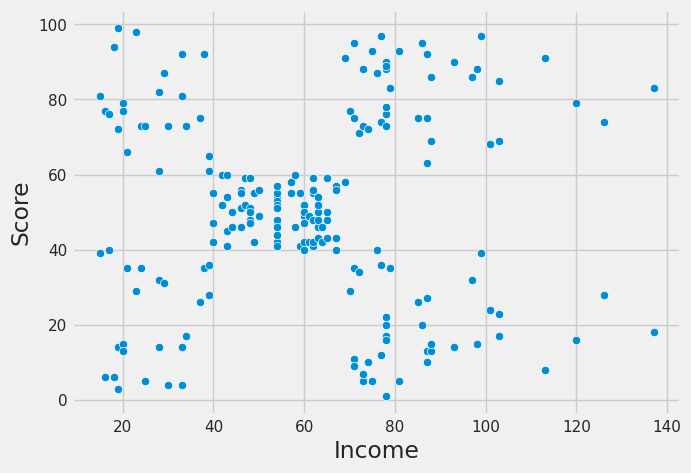

In [981]:
#build scatterplot chart
fig, ax= plt.subplots(figsize=(7,5))
sns.scatterplot(data = df1, x='Income',y='Score')

**SUMMARY**

Berdasarkan Scatterplot di atas, persebaran data belum dapat dianalisis dengan jelas untuk mendapatkan kategori-kategori mall dengan data income dan score. Oleh karena itu, diperlukannya modelling data menggunakan elbow method dan silhouette method untuk mengetahui kategori dari scatterplot tersebut.

##MODELLING

###ELBOW METHOD AND SILHOUETTE METHOD

In [982]:
pendapatan = ['Score', 'Income']
X = df1[pendapatan].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df1 = pd.DataFrame(data = X_std, columns = pendapatan)
new_df1.head()

,Score,Income
0,-0.434801,-1.738999
1,1.195704,-1.738999
2,-1.715913,-1.700830
3,1.040418,-1.700830
4,-0.395980,-1.662660


In [983]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2,10):
  
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(new_df1.values)
  inertia.append(kmeans.inertia_)
  print('iterasi ke - ',i, 'dengan : ', kmeans.inertia_)

iterasi ke -  2 dengan :  269.01679374906655
iterasi ke -  3 dengan :  157.7040081503594
iterasi ke -  4 dengan :  108.92131661364358
iterasi ke -  5 dengan :  65.56840815571681
iterasi ke -  6 dengan :  55.057348270386015
iterasi ke -  7 dengan :  44.91118554999014
iterasi ke -  8 dengan :  37.181757826821325
iterasi ke -  9 dengan :  32.375253681582876


In [984]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [985]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(new_df1)
    preds = kmeans.predict(new_df1)
     
    score_euclidean = silhouette_score(new_df1, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

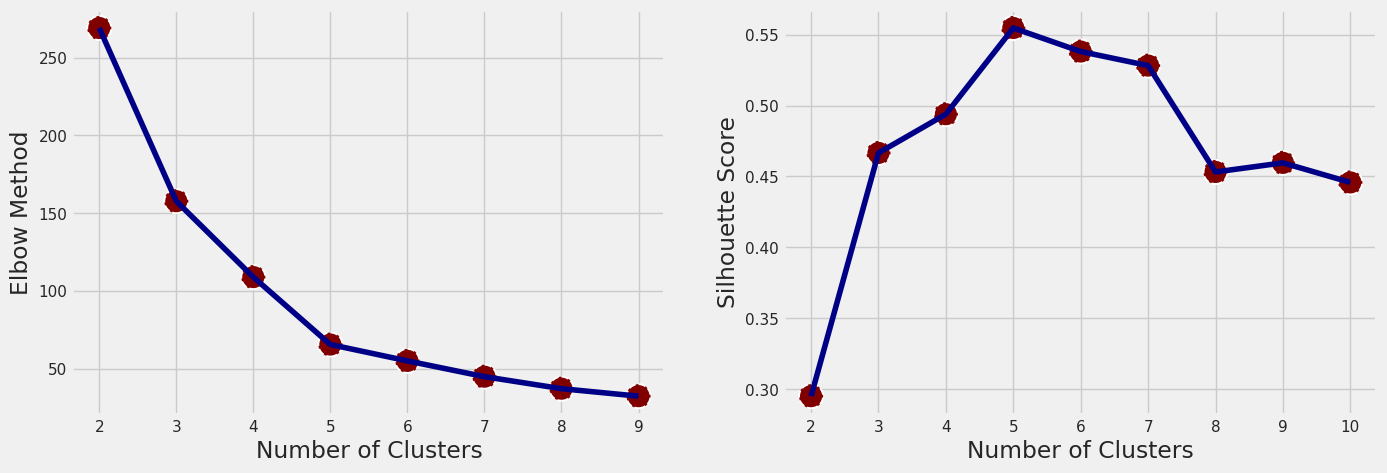

In [986]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(x=range(2,10), y=inertia, color='#000087', linewidth = 4, ax=axes[0])
sns.scatterplot(x=range(2,10), y=inertia, s=300, color='#800000',  linestyle='--', ax=axes[0])
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Elbow Method')

sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4, ax=axes[1])
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--', ax=axes[1])
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')

plt.show()

**SUMMARY**

Berdasarkan output chat di atas, kedua metode menghasilkan nilai yang sama yaitu 5. Elbow method dilihat dari titik-titik chart yang mempunyai posisi siku lalu titik tersebut menunjukkan penurunan nilai gradient sedangkan Silhouette Method dilihat dari titik tertinggi.

In [987]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(new_df1.values)

KMeans(n_clusters=5, random_state=0)

In [988]:
df1['cluster_5'] = kmeans.labels_

<Axes: xlabel='Score', ylabel='Income'>

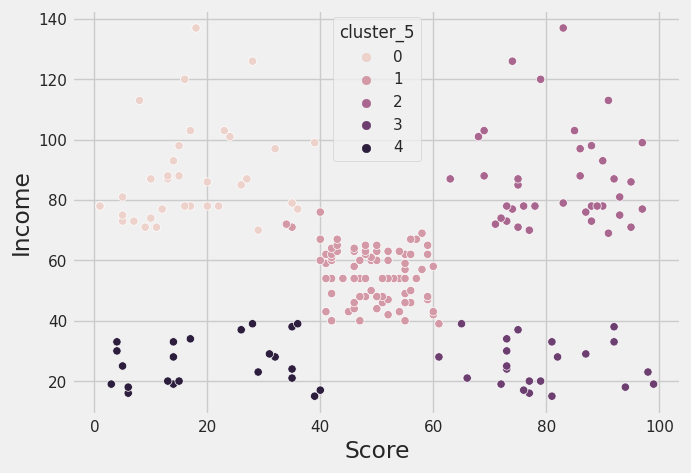

In [989]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=df1, x='Score', y='Income', hue='cluster_5')

In [990]:
display(df1.groupby('cluster_5').agg(['mean']))

,Income,Score
,mean,mean
cluster_5,,
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


In [991]:
display(df1.groupby('cluster_5').agg(['count']))

,Income,Score
,count,count
cluster_5,,
0,35,35
1,81,81
2,39,39
3,22,22
4,23,23


**SUMMARY ELBOW METHOD AND SILHOUETTE METHOD**

Kelompok 0: Kelompok ini memiliki rata-rata pendapatan sebesar 88.2 dan rata-rata skor sebesar 17.1. Kelompok ini memiliki jumlah pengunjung terbanyak kedua yaitu 35 orang. Kelompok ini dapat dikategorikan sebagai kelompok dengan pendapatan tinggi namun memiliki skor yang rendah.

Kelompok 1: Kelompok ini memiliki rata-rata pendapatan sebesar 55.3 dan rata-rata skor sebesar 49.5. Kelompok ini memiliki jumlah pengunjung terbanyak yaitu 81 orang. Kelompok ini dapat dikategorikan sebagai kelompok dengan pendapatan menengah dan skor yang sedang.

Kelompok 2: Kelompok ini memiliki rata-rata pendapatan sebesar 86.5 dan rata-rata skor sebesar 82.1. Kelompok ini memiliki jumlah pengunjung terbanyak ketiga yaitu 39 orang. Kelompok ini dapat dikategorikan sebagai kelompok dengan pendapatan tinggi dan skor yang tinggi.

Kelompok 3: Kelompok ini memiliki rata-rata pendapatan sebesar 25.7 dan rata-rata skor sebesar 79.4. Kelompok ini memiliki jumlah pengunjung terendah kedua yaitu 22 orang. Kelompok ini dapat dikategorikan sebagai kelompok dengan pendapatan rendah namun memiliki skor yang tinggi.

Kelompok 4: Kelompok ini memiliki rata-rata pendapatan sebesar 26.3 dan rata-rata skor sebesar 20.9. Kelompok ini memiliki jumlah pengunjung terendah yaitu 23 orang. Kelompok ini dapat dikategorikan sebagai kelompok dengan pendapatan rendah dan skor yang rendah.